# 1. Define genetic algorithm suite

In [1]:
from sklearn.gaussian_process.kernels import RBF, ConstantKernel

from src.prediction.gpr_model_trainer import GPRModelTrainer
from src.prediction.etr_model_trainer import EtrModelTrainer

from src.ga.chromosome.vent_hole import VentHole

from src.ga.gene.shape.shape_variations import (
    double_parabolic_params,
    ray_params,
    circle_params,
    donut_params,
    hole_params,
    trapezoid_params,
    triangle_params,
    wing_params,
)
from src.ga.gene.pattern.pattern_variations import (
    circular_params,
    corn_params,
    grid_params,
)

from src.ga.ga_pipeline import GAPipeline

from src.ga.p1_initialize.init_vent import VentInitializer
from src.ga.p2_fitness.vent_fitness import Criterion, VentFitnessCalculator
from src.ga.p3_select.behaviors import (
    TournamentSelectionFilter,
    ElitismSelectionFilter,
    RouletteWheelSelectionFilter,
)
from src.ga.p4_crossover.behaviors import (
    OnePointCrossover,
    TwoPointCrossover,
    UniformCrossover,
)

# ----------------- Define the GA CONSTANTS -----------------
# 1. Define the criteria weights, w1, w2, w3
CRITERIA_WEIGHT = (1.4, 1, 0.4)

# 2. Define the criteria with direction, min, and max values
DRAG_CRITERION: Criterion = ("lower", 0.2, 0.3)  # Lower is better, range 0.2 to 0.3
DRAG_STD_CRITERION: Criterion = ("lower", 0, 0.05)  # Lower is better, range 0 to 0.05

AVG_TEMP_CRITERION: Criterion = (
    "lower",
    250,
    450,
)  # Lower is better, range 250K to 400K
AVG_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

MAX_TEMP_CRITERION: Criterion = (
    "lower",
    300,
    500,
)  # Lower is better, range 300K to 500K
MAX_TEMP_STD_CRITERION: Criterion = ("lower", 0, 10)  # Lower is better, range 0K to 10K

# 3. Define the grid parameters
GRID_SCALE = 1
# Scaling factor

GRID_RESOLUTION = 2
# Grid resolution

GRID_WIDTH = 100
# Grid width, ~= canvas size

GRID_BOUND = (
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
    (-GRID_WIDTH / 2, GRID_WIDTH / 2),
)
# ----------------- Define the GA MODELS -----------------

gpr_kernel = ConstantKernel(1.0, (1e-2, 1e2)) * RBF(1.0, (1e-2, 1e2))
gpr_model_trainer = GPRModelTrainer(
    gpr_kernel=gpr_kernel,
    gpr_drag_config=(10, 1e-5),
    gpr_max_temp_config=(10, 1e-3),
    gpr_avg_temp_config=(10, 1e-3),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

etr_model_trainer = EtrModelTrainer(
    etr_drag_config=(100, 42),
    etr_max_temp_config=(100, 42),
    etr_avg_temp_config=(100, 42),
    grid_bound=GRID_BOUND,
    grid_bound_width=GRID_WIDTH,
    grid_resolution=GRID_RESOLUTION,
    grid_scale=GRID_SCALE,
    desired_variance=0.9,
)

# ----------------- Define the GA PIPELINES -----------------
suite = GAPipeline[VentHole](
    suite_name="exp/tournament/config",
    suite_max_count=50,
    suite_min_population=20,
    suite_min_chromosome=40,
    crossover_behavior=UniformCrossover(),
    selector_behavior=TournamentSelectionFilter(tournament_size=4),
    fitness_calculator=VentFitnessCalculator(
        model_trainer_tuple=(
            gpr_model_trainer,
            etr_model_trainer,
            etr_model_trainer,
        ),
        criteria_weight_list=CRITERIA_WEIGHT,
        drag_criterion=DRAG_CRITERION,
        drag_std_criterion=DRAG_STD_CRITERION,
        avg_temp_criterion=AVG_TEMP_CRITERION,
        avg_temp_std_criterion=AVG_TEMP_STD_CRITERION,
        max_temp_criterion=MAX_TEMP_CRITERION,
        max_temp_std_criterion=MAX_TEMP_STD_CRITERION,
    ),
    immediate_exit_condition=lambda x: x[0] >= 0.725 and x[1] >= 0.725,
    mutation_probability=0.01,
    population_initializer=VentInitializer(
        population_size=500,
        grid_scale=GRID_SCALE,
        grid_resolution=GRID_RESOLUTION,
        pattern_bound=GRID_BOUND,
        pattern_gene_pool=[circular_params],
        shape_gene_pool=[
            double_parabolic_params,     
            ray_params,
            circle_params,
            donut_params,
            hole_params,
            trapezoid_params,
            triangle_params,
            wing_params,
        ],
    ),
)

[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[Storage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/gene_parameters.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/shape_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.json
[StochasticStorage]: JSON data loaded from c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/pattern_gene_pdf.j

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified lower bound 0.01. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__length_scale is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 100.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\gaussian_process\kernels.py:430: C

-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
--------------------------------------------------------------------------------
| [ModelTrainer]: Optimal feature count founded: 151 for desired variance: 0.9 |
--------------------------------------------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
-----------------------------------------------
| [ModelTrainer]: Training set found, loading |
-----------------------------------------------
----------------------------------------------------
| [ModelTrainer]: PCA optimal founding initialized |
----------------------------------------------------
-------

# 2. Run genetic algorithm

매번 run을 실행할 때마다, 개체 수, 격자 해상도 등에 따라 다르지만, **수행 시간이 길 수 있습니다.**

In [2]:
suite.run()

----------------------------------------------------------------------------------------------------
>> GA started
----------------------------------------------------------------------------------------------------
Suite_name: exp/tournament/config
Suite_max_count: 50
Suite_min_population: 20
Suite_min_chromosome: 40
Immediate_exit: False
Generation: 0
Initial_population: 500
Population_count: 0
Unique_population_count: 0
Mutation_count: 0
Mutation_probability: 0.01
Fitness_calculator: GPR
Selector_behavior: TournamentSelection
Crossover_behavior: Uniform Crossover
Population_initializer: VentInitializer
----------------------------------------------------------------------------------------------------
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/fitness_evolution.json
[StochasticStorage]: JSON data saved to c:\Users\eaton\Desktop\Capstone_Simulation\capstone_1_er1\store/exp/tournament/config/biased_fitn

# 3. Plot fitness result

- `biased_fitness`: 가중치가 적용된 fitness, $w1 * p1 + w2 * p2+ ...$
- `fitness`: 가중치 없이 계산된 fitness, $p1 + p2 + ...$

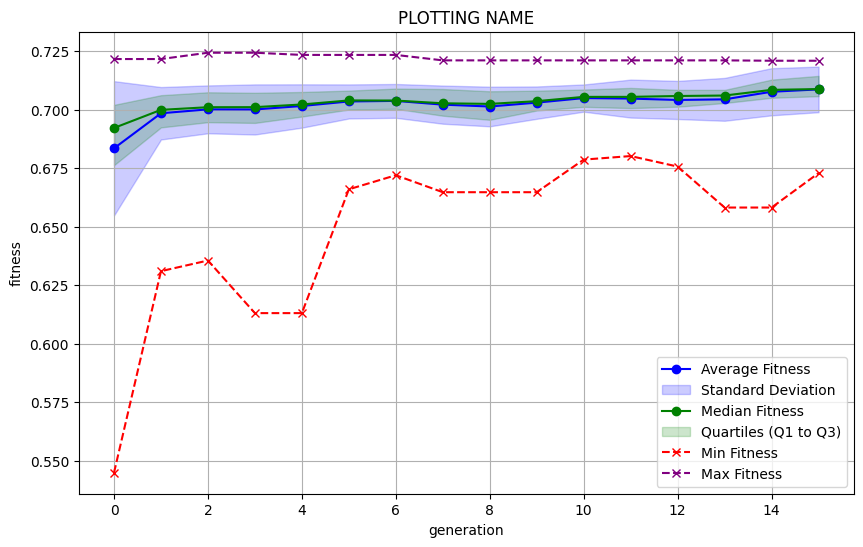

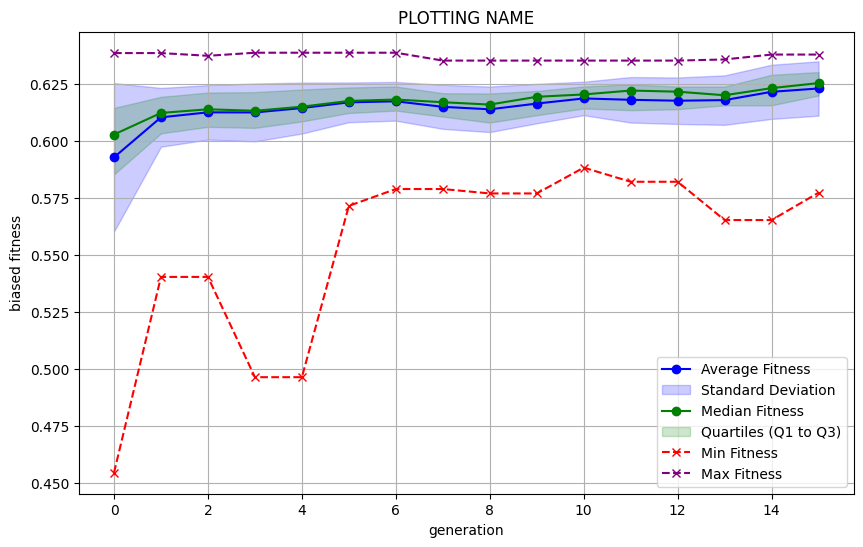

In [3]:
suite.evolution_storage.plot_fitness(
    storage="fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="fitness",
)
suite.evolution_storage.plot_fitness(
    storage="biased_fitness",
    title="PLOTTING NAME",
    xlabel="generation",
    ylabel="biased fitness",
)

# 4. Analyze final population(unique)

1. population은 최종 선택된 개체만 남게 됩니다.
2. `population[i]`는 각 VentHole 유전자(Chromosome)이 도출됩니다.
3. `population[i].pattern_matrix` 에는 pattern에 격자화된 point vector가 존재합니다.
3. `population[i].gene_tuple` 을 통해 최종적인 유전자에 접근할 수 있습니다.


--------------------------------------------------
label: VentHole Chromosome_306: ['DoubleParabolicShape_334', 'CircularStrictTransformation_334']
predict: (0.2922373982470696, 373.1192842000002, 457.82424259999993)
biased_fitness: 0.5774315183410242, fitness: 0.6729083835293029
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


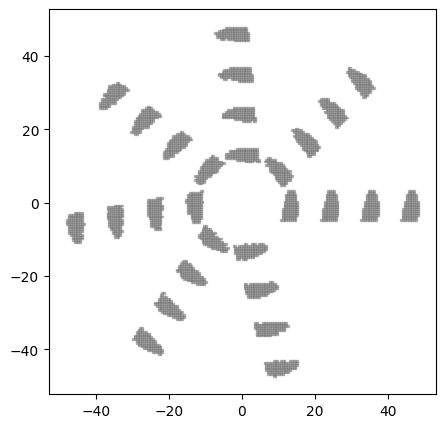

--------------------------------------------------
label: VentHole Chromosome_56: ['DoubleParabolicShape_182', 'CircularStrictTransformation_306']
predict: (0.2890313752015681, 372.8730057000001, 457.21685269999995)
biased_fitness: 0.6247620132780465, fitness: 0.709236955984319
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


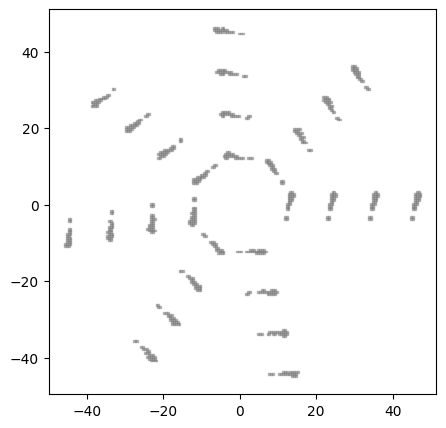

--------------------------------------------------
label: VentHole Chromosome_47: ['DoubleParabolicShape_56', 'CircularStrictTransformation_306']
predict: (0.2887265569832267, 373.1689643, 457.5172088)
biased_fitness: 0.6269489631348262, fitness: 0.7093035646677329
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


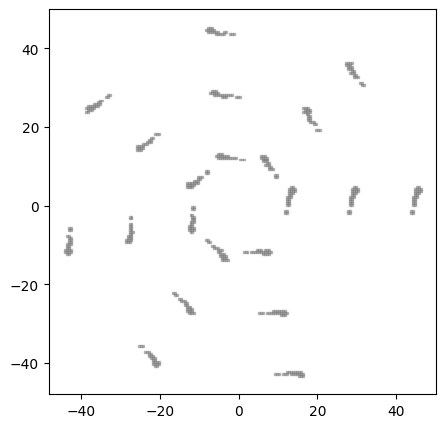

--------------------------------------------------
label: VentHole Chromosome_182: ['DoubleParabolicShape_124', 'CircularStrictTransformation_47']
predict: (0.2890044343097449, 372.60003290000003, 456.6974776000001)
biased_fitness: 0.6275427999635712, fitness: 0.7134681044025504
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


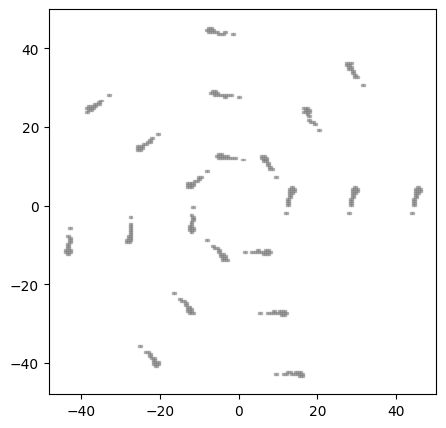

--------------------------------------------------
label: VentHole Chromosome_437: ['DoubleParabolicShape_306', 'CircularStrictTransformation_182']
predict: (0.28860697356480625, 372.90481150000005, 458.28948619999994)
biased_fitness: 0.6283993401927123, fitness: 0.7079587758519374
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


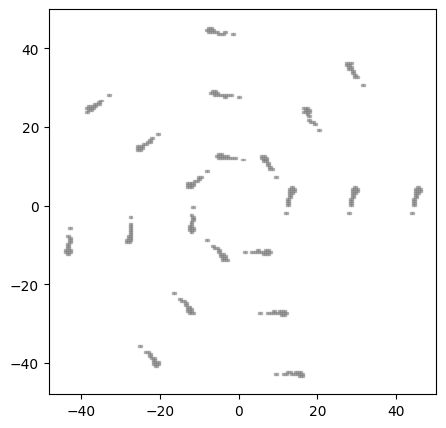

--------------------------------------------------
label: VentHole Chromosome_339: ['DoubleParabolicShape_488', 'CircularStrictTransformation_124']
predict: (0.2911788573229961, 373.2868321999998, 457.1156380999998)
biased_fitness: 0.5928305602780559, fitness: 0.686199075270041
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


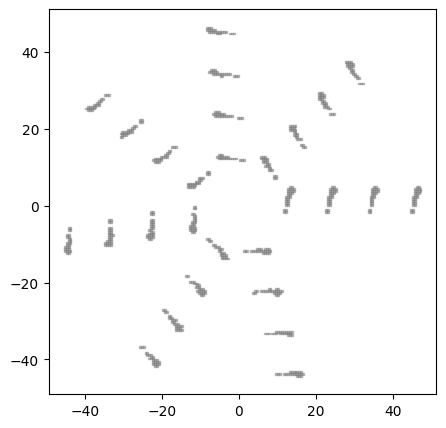

--------------------------------------------------
label: VentHole Chromosome_182: ['DoubleParabolicShape_306', 'CircularStrictTransformation_306']
predict: (0.2892295795928974, 373.2405175999998, 457.00479199999995)
biased_fitness: 0.6205737136994371, fitness: 0.706477656071027
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


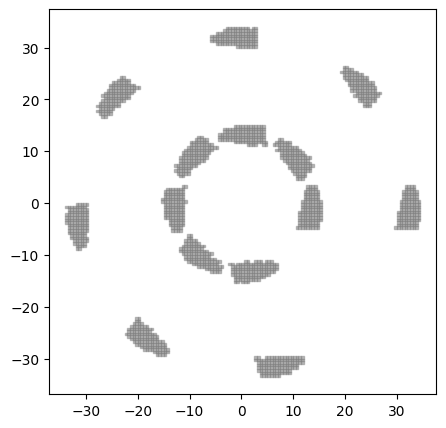

--------------------------------------------------
label: VentHole Chromosome_16: ['DoubleParabolicShape_182', 'CircularStrictTransformation_437']
predict: (0.2892603332243724, 373.0555904, 456.9519208)
biased_fitness: 0.6211735412587863, fitness: 0.707359111756276
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


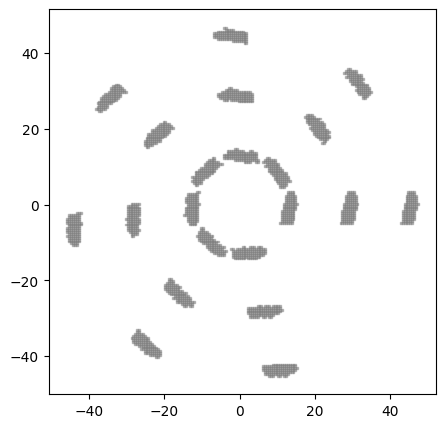

--------------------------------------------------
label: VentHole Chromosome_182: ['DoubleParabolicShape_306', 'CircularStrictTransformation_498']
predict: (0.2887590461814902, 373.17858729999983, 456.4167414999998)
biased_fitness: 0.6286469339591386, fitness: 0.7144328941851
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


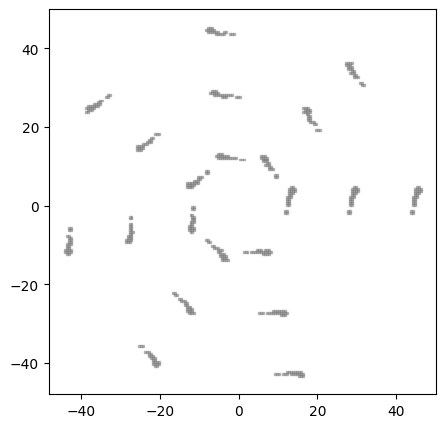

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_182', 'CircularStrictTransformation_306']
predict: (0.28865879966249164, 373.20046070000006, 457.2220728)
biased_fitness: 0.6283303556251166, fitness: 0.7112993358750833
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


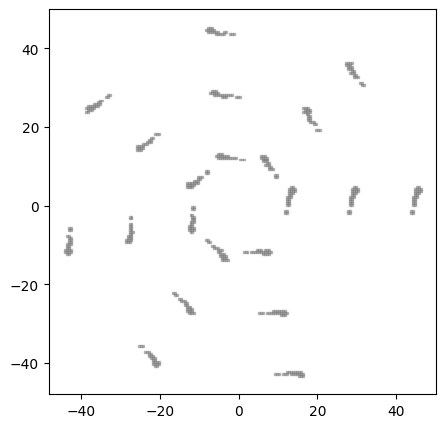

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_220', 'CircularStrictTransformation_488']
predict: (0.2887871578021155, 373.26982950000007, 457.395368)
biased_fitness: 0.6258399072703824, fitness: 0.7088024344788444
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


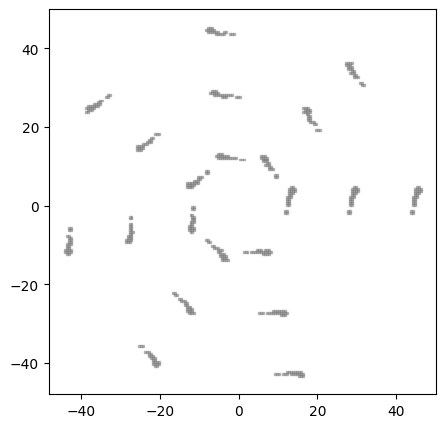

--------------------------------------------------
label: VentHole Chromosome_394: ['DoubleParabolicShape_47', 'CircularStrictTransformation_182']
predict: (0.28840686152840833, 373.04833429999985, 456.9873471)
biased_fitness: 0.6330875729022839, fitness: 0.7157529777159172
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


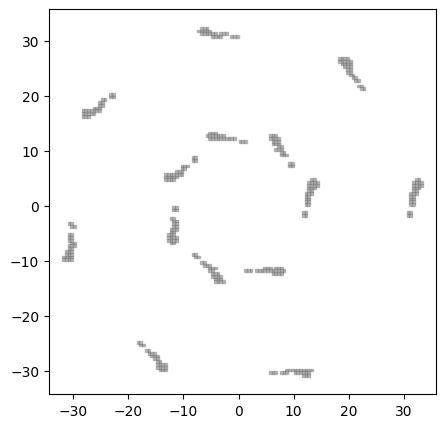

--------------------------------------------------
label: VentHole Chromosome_370: ['DoubleParabolicShape_306', 'CircularStrictTransformation_394']
predict: (0.2889796383787022, 373.19114129999997, 457.15564399999994)
biased_fitness: 0.6240180681981691, fitness: 0.7084696897129782
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


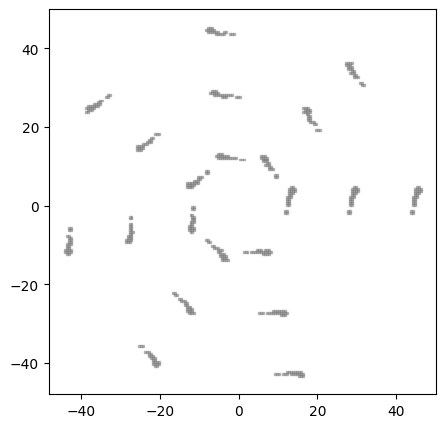

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_182', 'CircularStrictTransformation_488']
predict: (0.2890306758228989, 372.7490500999998, 456.7631681000001)
biased_fitness: 0.6262989517794164, fitness: 0.7121321507710117
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


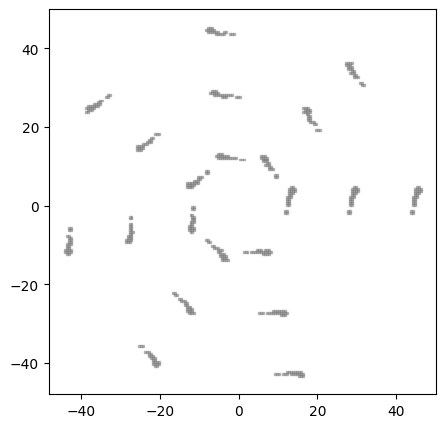

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_306', 'CircularStrictTransformation_498']
predict: (0.2885660804434904, 373.04363329999995, 457.358659)
biased_fitness: 0.6301393892911343, fitness: 0.7123277340650961
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


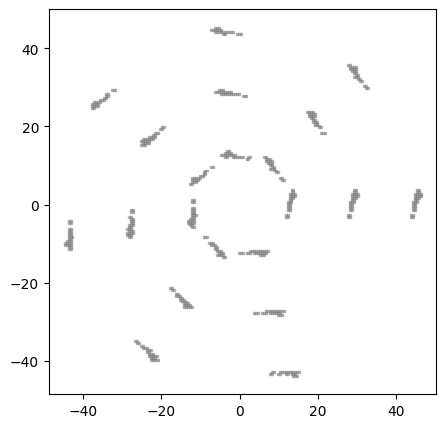

--------------------------------------------------
label: VentHole Chromosome_47: ['DoubleParabolicShape_498', 'CircularStrictTransformation_498']
predict: (0.2898015333319781, 372.82863260000005, 456.4271784999998)
biased_fitness: 0.6157810133523064, fitness: 0.7057056111802195
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


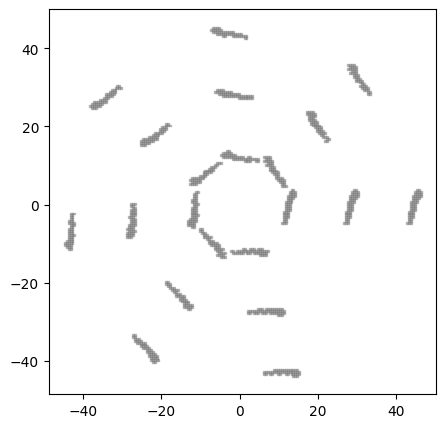

--------------------------------------------------
label: VentHole Chromosome_394: ['DoubleParabolicShape_182', 'CircularStrictTransformation_56']
predict: (0.28984023770736345, 373.41013360000005, 457.58011199999993)
biased_fitness: 0.6100257800969114, fitness: 0.6966463949263655
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


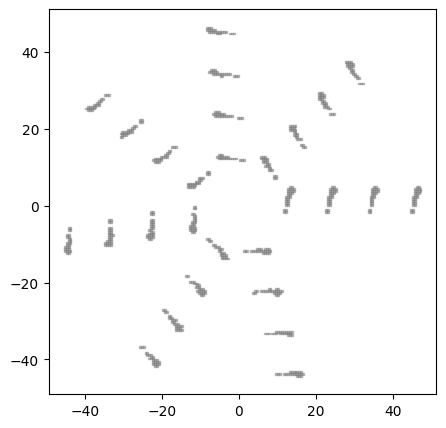

--------------------------------------------------
label: VentHole Chromosome_16: ['DoubleParabolicShape_498', 'CircularStrictTransformation_182']
predict: (0.288360556475618, 372.9500743, 456.14748449999985)
biased_fitness: 0.6359068688413485, fitness: 0.720906641243821
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


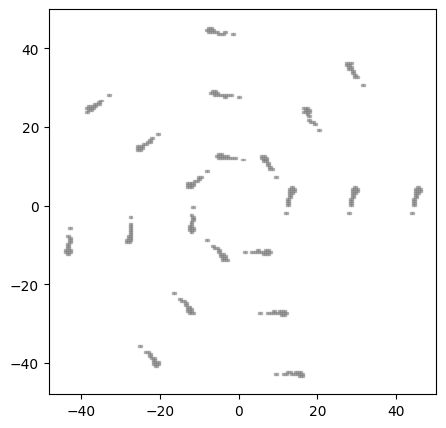

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_394', 'CircularStrictTransformation_394']
predict: (0.2893330729941481, 373.21348860000006, 457.2607817999999)
biased_fitness: 0.6187479714819261, fitness: 0.7042979180585189
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


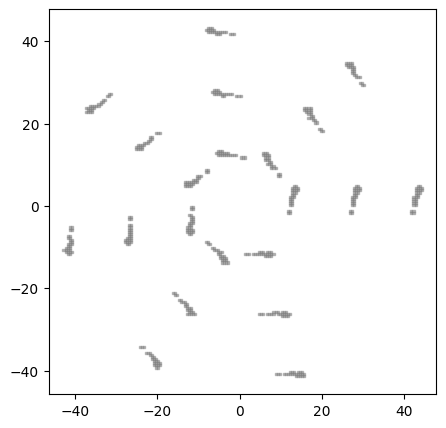

--------------------------------------------------
label: VentHole Chromosome_16: ['DoubleParabolicShape_394', 'CircularStrictTransformation_394']
predict: (0.288360556475618, 372.9500743, 456.14748449999985)
biased_fitness: 0.6359068688413485, fitness: 0.720906641243821
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


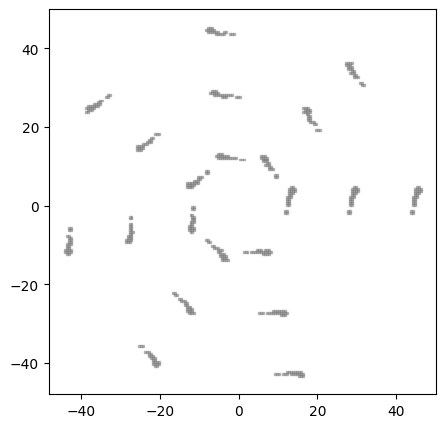

--------------------------------------------------
label: VentHole Chromosome_394: ['DoubleParabolicShape_16', 'CircularStrictTransformation_306']
predict: (0.288360556475618, 372.9500743, 456.14748449999985)
biased_fitness: 0.6359068688413485, fitness: 0.720906641243821
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


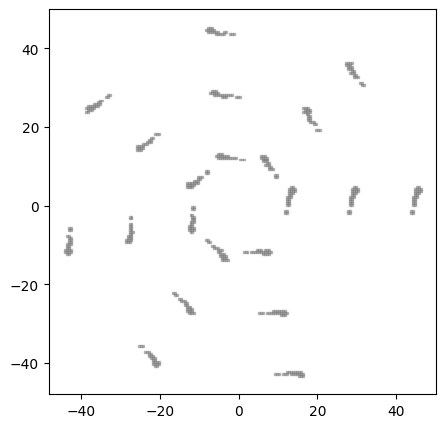

--------------------------------------------------
label: VentHole Chromosome_459: ['DoubleParabolicShape_488', 'CircularStrictTransformation_182']
predict: (0.28889282040924535, 373.00007560000006, 457.49169099999995)
biased_fitness: 0.6255167542705646, fitness: 0.7086129629075463
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


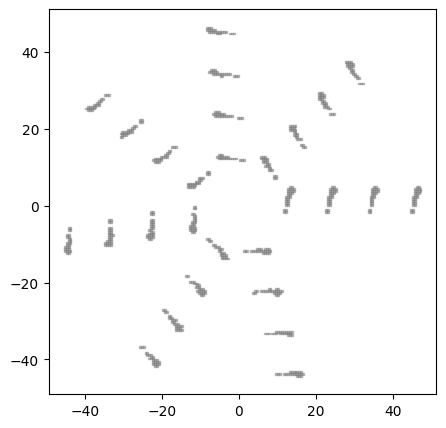

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_459', 'CircularStrictTransformation_182']
predict: (0.28939880210838687, 373.3552385999999, 455.55216889999997)
biased_fitness: 0.6205362396825844, fitness: 0.711474941416132
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


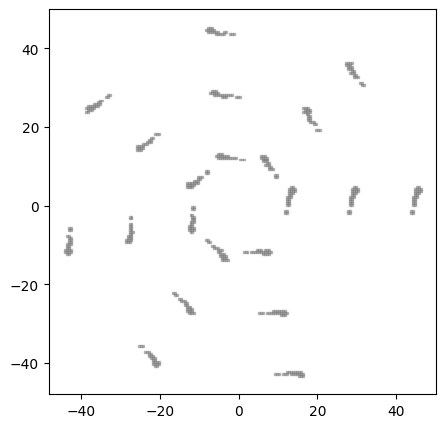

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_182', 'CircularStrictTransformation_498']
predict: (0.2886636347793543, 373.2263687, 457.71566789999997)
biased_fitness: 0.6271459337890395, fitness: 0.7086534692064568
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


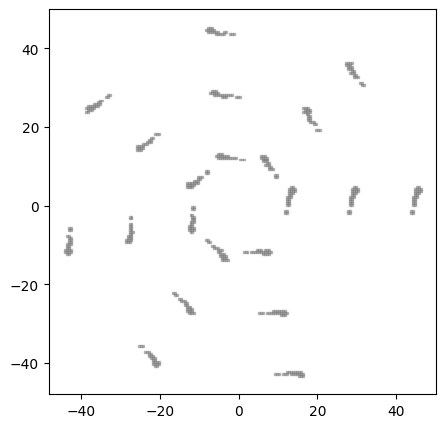

--------------------------------------------------
label: VentHole Chromosome_85: ['DoubleParabolicShape_182', 'CircularStrictTransformation_306']
predict: (0.2881192023514578, 372.8593090999999, 456.98777979999994)
biased_fitness: 0.6380590619795908, fitness: 0.7195725319854224
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


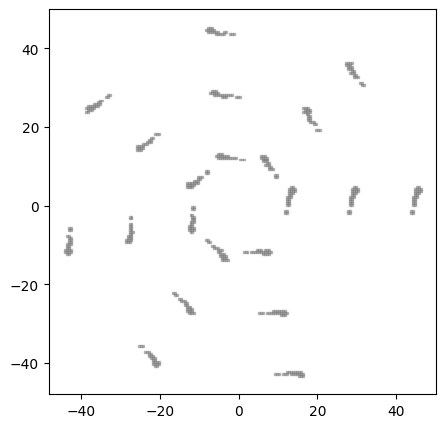

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_85', 'CircularStrictTransformation_498']
predict: (0.2885044572355411, 373.2394209, 457.1850266000001)
biased_fitness: 0.6303704410024245, fitness: 0.7128331901445883
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


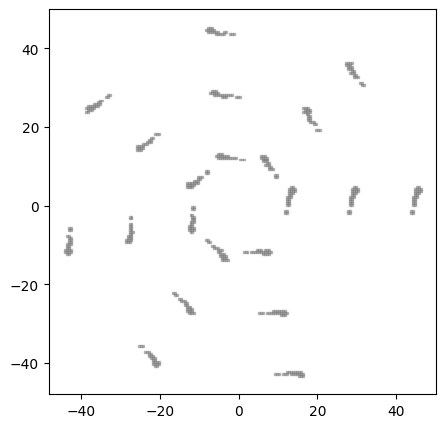

--------------------------------------------------
label: VentHole Chromosome_47: ['DoubleParabolicShape_498', 'CircularStrictTransformation_498']
predict: (0.28869947443200017, 372.9458696, 456.3733866999999)
biased_fitness: 0.6307312365519977, fitness: 0.7164089741799987
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


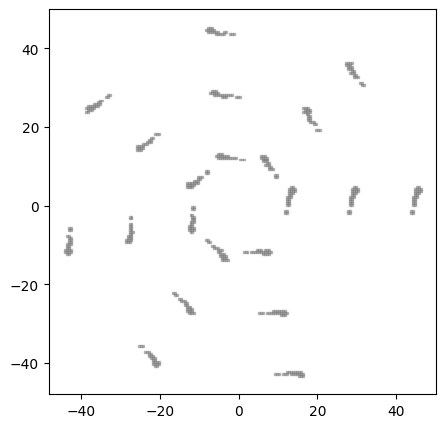

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_498', 'CircularStrictTransformation_19']
predict: (0.28931941584487086, 373.1858098000001, 455.27417900000006)
biased_fitness: 0.6230507711718073, fitness: 0.7145058975512906
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


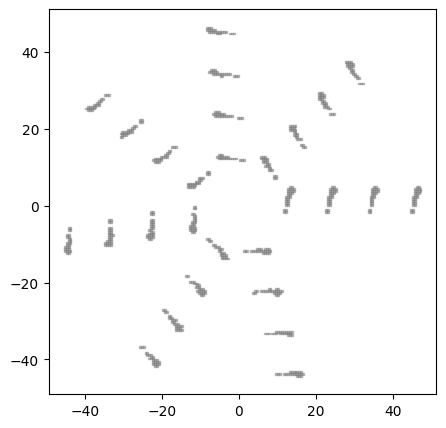

--------------------------------------------------
label: VentHole Chromosome_182: ['DoubleParabolicShape_498', 'CircularStrictTransformation_488']
predict: (0.2888361690388448, 373.24993370000004, 457.30200949999994)
biased_fitness: 0.6254399459561727, fitness: 0.708878593611552
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


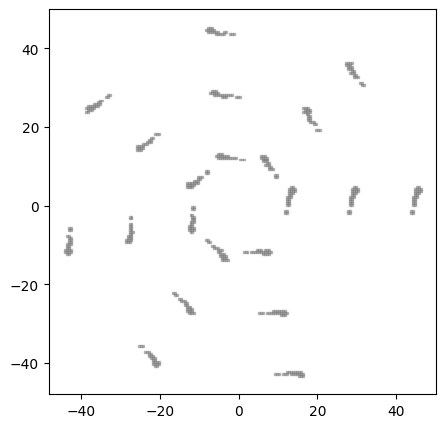

--------------------------------------------------
label: VentHole Chromosome_200: ['DoubleParabolicShape_56', 'CircularStrictTransformation_182']
predict: (0.2885044572355411, 373.2394209, 457.1850266000001)
biased_fitness: 0.6303704410024245, fitness: 0.7128331901445883
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


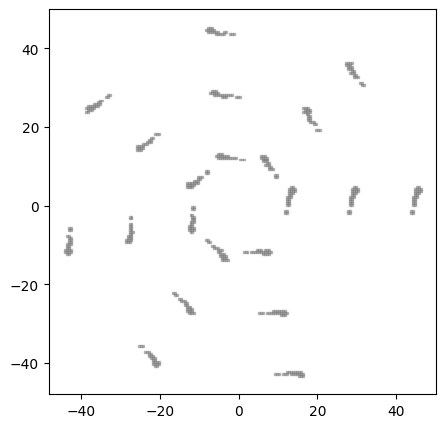

--------------------------------------------------
label: VentHole Chromosome_220: ['DoubleParabolicShape_200', 'CircularStrictTransformation_437']
predict: (0.2889796383787022, 373.19114129999997, 457.15564399999994)
biased_fitness: 0.6240180681981691, fitness: 0.7084696897129782
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


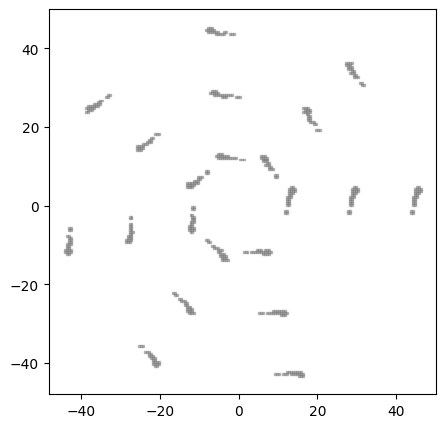

--------------------------------------------------
label: VentHole Chromosome_394: ['DoubleParabolicShape_334', 'CircularStrictTransformation_306']
predict: (0.2901992338742705, 372.73182180000003, 455.25677789999975)
biased_fitness: 0.6130380609602133, fitness: 0.7080646627572961
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


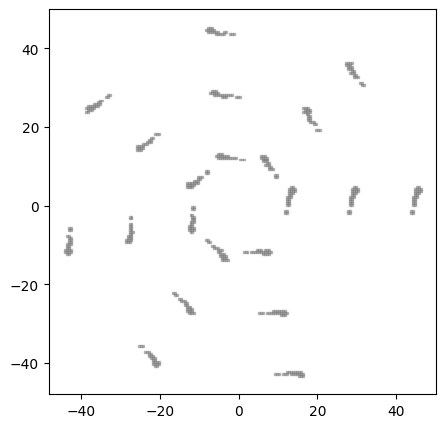

--------------------------------------------------
label: VentHole Chromosome_488: ['DoubleParabolicShape_498', 'CircularStrictTransformation_182']
predict: (0.2890998282674535, 373.1490174, 455.6593205)
biased_fitness: 0.6255386762556508, fitness: 0.714960027825465
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


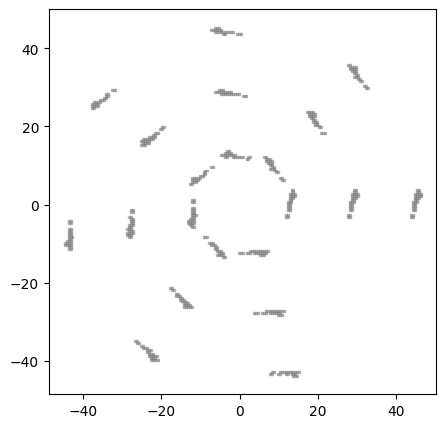

--------------------------------------------------
label: VentHole Chromosome_498: ['DoubleParabolicShape_274', 'CircularStrictTransformation_394']
predict: (0.2894000429538177, 372.78521, 460.4041290999999)
biased_fitness: 0.6136650904465519, fitness: 0.6900528749618231
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


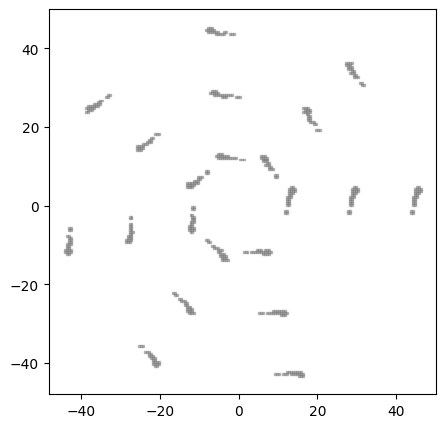

--------------------------------------------------
label: VentHole Chromosome_220: ['DoubleParabolicShape_370', 'CircularStrictTransformation_459']
predict: (0.2890245386136334, 373.06312670000005, 458.0383811999998)
biased_fitness: 0.6222640635091321, fitness: 0.7042470743636665
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


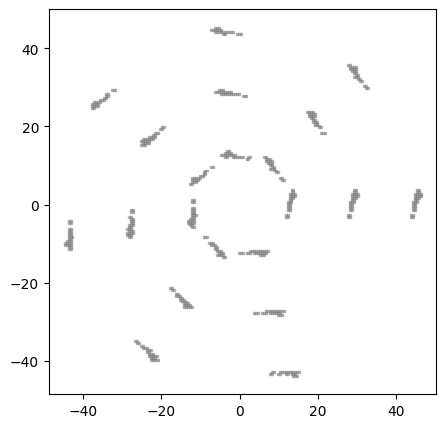

--------------------------------------------------
label: VentHole Chromosome_334: ['DoubleParabolicShape_334', 'CircularStrictTransformation_370']
predict: (0.29006953861292617, 373.1031618999999, 456.99667669999985)
biased_fitness: 0.6095172965190341, fitness: 0.6988054208707393
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


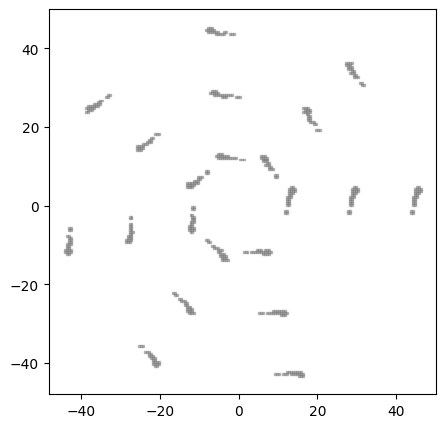

--------------------------------------------------
label: VentHole Chromosome_182: ['DoubleParabolicShape_306', 'CircularStrictTransformation_498']
predict: (0.288859399243095, 373.14652320000016, 457.0498882999998)
biased_fitness: 0.6261360179966693, fitness: 0.71042395006905
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


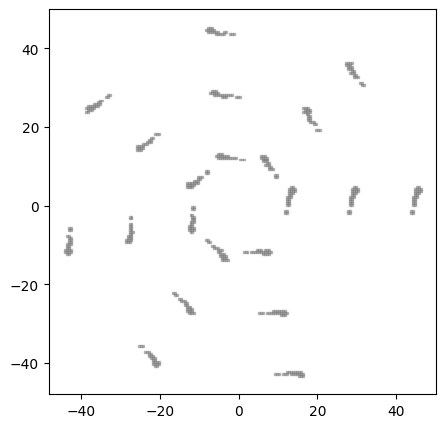

--------------------------------------------------
label: VentHole Chromosome_437: ['DoubleParabolicShape_394', 'CircularStrictTransformation_182']
predict: (0.2906930024369112, 372.7134157999998, 456.36631579999977)
biased_fitness: 0.6039982552832446, fitness: 0.6976713176308901
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 8.244832286800463, dx: 5.970293229333056, phi: 0.6283185307179586, ]


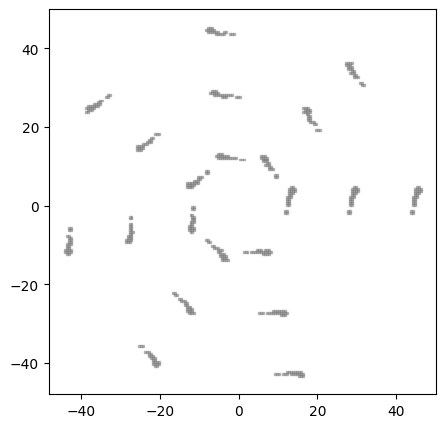

--------------------------------------------------
label: VentHole Chromosome_152: ['DoubleParabolicShape_394', 'CircularStrictTransformation_370']
predict: (0.28860697356480625, 372.90481150000005, 458.28948619999994)
biased_fitness: 0.6283993401927123, fitness: 0.7079587758519374
shape parameter:
parameter_list: [ lower_coefficient: 1.0482603215021493, upper_coefficient: 2.8773310566738504, lower_y-intercept: 3.389873293248809, upper_y-intercept_from_lower_y: 1.6594722685249224, lower_x_trans: -0.8391674779677594, ]
pattern parameter:
parameter_list: [ di: 10.865865142087346, dx: 5.970293229333056, phi: 0.6283185307179586, ]


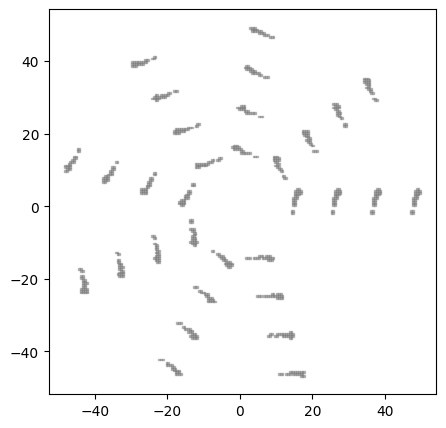

In [4]:
from src.grid.visualize_points import visualize_points


for pop in suite.unique_population:
    print("-" * 50)
    print(f"label: {pop.label}")
    print(f"predict: {pop.fitness_pure_result}")
    print(f"biased_fitness: {pop.biased_fitness}, fitness: {pop.fitness}")

    shape, pattern = pop.gene_tuple
    print("shape parameter:")
    shape.print_parameter_info()
    print("pattern parameter:")
    pattern.print_parameter_info()

    visualize_points(
        pop.pattern.pattern_matrix,
        pop.pattern.pattern_unit.grid.k,
        fig_size=(5, 5),
    )